In [63]:
import yaml,logging,numpy
from optparse import OptionParser
from feature import Feature
from matplotlib import pyplot as plt
%matplotlib inline
features = yaml.load(open('features.yml'))
nlangs = 2679
logging.basicConfig(level=logging.ERROR)

# do the main #
base_matrix = numpy.zeros((0,nlangs))
for name,data in features.items():
    feat =  Feature(name,data)
    base_matrix = numpy.vstack((base_matrix,feat.get_languages()))

print(numpy.cov(base_matrix))

[[ 0.37508311  0.06935237  0.04724908]
 [ 0.06935237  2.32882366 -0.17189556]
 [ 0.04724908 -0.17189556  0.49177641]]


In [64]:
cases = Feature('number_of_cases', features['number_of_cases']).get_languages()
orders = Feature('word_order1', features['word_order1']).get_languages()
new_base = numpy.zeros((0,2))
for o,c in zip(orders,cases):
    if c != 0 and o != 0:
        new_base = numpy.vstack((new_base,numpy.array([o,c])))
print(new_base.shape)

(239, 2)


In [65]:
print(numpy.cov(numpy.transpose(new_base)))

[[ 0.52557927 -0.27681868]
 [-0.27681868  9.02306529]]


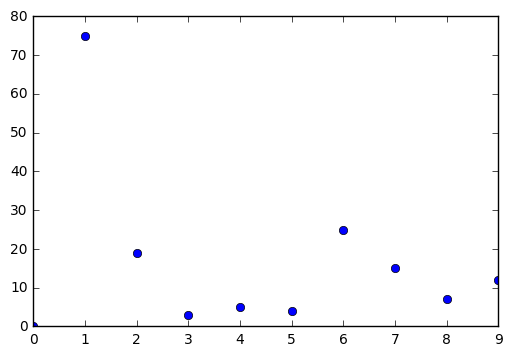

In [66]:
cases_counts = numpy.zeros(10)
for i in range(new_base.shape[0]):
    cases_counts[int(new_base[i,][1])] += new_base[i,][0]
plt.plot(range(10),cases_counts,'o')

In [67]:
print(numpy.cov(numpy.transpose(new_base)))

[[ 0.52557927 -0.27681868]
 [-0.27681868  9.02306529]]


In [68]:
cases = Feature('number_of_cases', features['number_of_cases']).get_languages()
orders = Feature('issvo', features['issvo']).get_languages()
new_base = numpy.zeros((0,2))
for o,c in zip(orders,cases):
    if c != 0 and o != 0:
        new_base = numpy.vstack((new_base,numpy.array([o,c])))
print(new_base.shape)
print(numpy.cov(numpy.transpose(new_base)))

(239, 2)
[[ 0.83878907 -1.00298864]
 [-1.00298864  9.02306529]]


In [69]:
svo_counts = numpy.zeros(2)
for i in range(new_base.shape[0]):
    svo_counts[int(new_base[i,][0])] += new_base[i,][1]
svo_counts/new_base.shape[0]

array([ 0.        ,  3.92050209])

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(new_base)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)

[ 0.92722822  0.07277178]


In [72]:
from feature import languages
coverage = languages.ix[:,10:]
coverage = coverage.replace(to_replace=".+",regex=True,value=1)
coverage = coverage.replace(to_replace='',value=0)

In [74]:
feature_cover = coverage.apply(lambda f: sum(f))
feature_cover[['49A Number of Cases', '81A Order of Subject, Object and Verb']]

49A Number of Cases                       261
81A Order of Subject, Object and Verb    1377
dtype: int64

In [18]:
feature_cover.describe()

count     192.000000
mean      398.255208
std       349.743066
min         5.000000
25%       171.500000
50%       257.000000
75%       508.250000
max      1519.000000
dtype: float64

In [20]:
from scipy.stats import percentileofscore as pcor
round(193*(1 - pcor(feature_cover.values,1000)/100))

19.0

In [24]:
for i in feature_cover.keys():
    if feature_cover[i] > 1000:
        print(i)

33A Coding of Nominal Plurality
51A Position of Case Affixes
69A Position of Tense-Aspect Affixes
81A Order of Subject, Object and Verb
82A Order of Subject and Verb
83A Order of Object and Verb
85A Order of Adposition and Noun Phrase
86A Order of Genitive and Noun
87A Order of Adjective and Noun
88A Order of Demonstrative and Noun
89A Order of Numeral and Noun
95A Relationship between the Order of Object and Verb and the Order of Adposition and Noun Phrase
97A Relationship between the Order of Object and Verb and the Order of Adjective and Noun
112A Negative Morphemes
143F Postverbal Negative Morphemes
144A Position of Negative Word With Respect to Subject, Object, and Verb
143E Preverbal Negative Morphemes
143A Order of Negative Morpheme and Verb
143G Minor morphological means of signaling negation


In [75]:
coverage['features_count'] = coverage.apply(lambda x: sum(x), axis=1)
coverage['features_count'].describe()

count    2679.000000
mean       28.542367
std        32.509716
min         0.000000
25%         4.000000
50%        19.000000
75%        38.000000
max       159.000000
Name: features_count, dtype: float64

In [76]:
coverage[coverage['features_count'] > 120]['features_count'].describe()

count    107.000000
mean     136.841121
std       10.499910
min      121.000000
25%      127.500000
50%      137.000000
75%      144.000000
max      159.000000
Name: features_count, dtype: float64

So we have 107 languages with more than 120 features.
Let's intesect these rows with the top quartile of features (that is features that cover more than 508 languages):

In [87]:
q = feature_cover.quantile(0.75)
top_features = list()
for i in feature_cover.keys():
    if feature_cover[i] > q:
        top_features.append(i)

top_langs = coverage[coverage['features_count'] > 120]
top_langs.describe()

,1A Consonant Inventories,2A Vowel Quality Inventories,3A Consonant-Vowel Ratio,4A Voicing in Plosives and Fricatives,5A Voicing and Gaps in Plosive Systems,6A Uvular Consonants,7A Glottalized Consonants,8A Lateral Consonants,9A The Velar Nasal,10A Vowel Nasalization,...,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives,features_count
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.0,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.971963,0.981308,0.981308,0.981308,0.981308,0.981308,0.981308,0.981308,0.990654,0.934579,...,0.915888,0.981308,0.0,0.953271,0.915888,0.953271,0.018692,0.953271,0.943925,136.841121
std,0.165856,0.136071,0.136071,0.136071,0.136071,0.136071,0.136071,0.136071,0.096674,0.248430,...,0.278862,0.136071,0.0,0.212051,0.278862,0.212051,0.136071,0.212051,0.231149,10.499910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,127.500000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,137.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,144.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,159.000000


The Good 107 languages are:

In [93]:
for i in top_langs.index:
    print(languages.iloc[i]['Name'],coverage.iloc[i]['features_count'])

Abkhaz 148
Arabic (Egyptian) 145
Ainu 134
Alamblak 134
Amele 150
Apurinã 130
Armenian (Eastern) 129
Arapesh (Mountain) 122
Asmat 122
Awa Pit 131
Bagirmi 126
Burmese 140
Basque 149
Burushaski 140
Chamorro 140
Chukchi 137
Canela-Krahô 129
English 159
Epena Pedee 121
Evenki 149
Fijian 141
Finnish 155
French 158
Georgian 150
German 157
Gooniyandi 128
Grebo 123
Greek (Modern) 155
Greenlandic (West) 142
Guaraní 137
Hausa 148
Hebrew (Modern) 141
Hindi 144
Hixkaryana 138
Hmong Njua 121
Hungarian 155
Hunzib 121
Imonda 126
Indonesian 153
Jakaltek 134
Japanese 151
Ju|'hoan 121
Kayardild 132
Ket 124
Kewa 124
Koromfe 121
Khalkha 144
Khoekhoe 137
Kiowa 124
Kilivila 121
Kannada 145
Kanuri 137
Koasati 125
Kobon 130
Korean 149
Krongo 138
Kutenai 133
Lango 141
Latvian 126
Lavukaleve 135
Lezgian 149
Lakhota 135
Luvale 127
Malagasy 144
Maori 145
Mapudungun 138
Maricopa 134
Maung 126
Maybrat 140
Meithei 132
Mandarin 153
Martuthunira 136
Mixtec (Chalcatongo) 132
Mangarrayi 133
Ngiyambaa 136
Nivkh 131
Oneida

How many languages over all have all or allmost all the top features in common?

In [123]:
intersection = coverage[coverage['features_count'] > 120].filter(items=top_features)
for i,r in intersection.iterrows():
    if r.sum() > 45:
        print(languages.iloc[i]['Name'])

Abkhaz
Basque
English
Evenki
Finnish
French
Georgian
German
Greek (Modern)
Hausa
Hungarian
Indonesian
Jakaltek
Japanese
Ju|'hoan
Kewa
Koromfe
Khalkha
Kanuri
Korean
Lezgian
Malagasy
Maori
Mangarrayi
Russian
Slave
Spanish
Thai
Tiwi
Turkish
Wichí
Yaqui
